# Задача 1

In [27]:
%matplotlib inline
import numpy as np
import math as mt
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import *
from mpl_toolkits.mplot3d import Axes3D

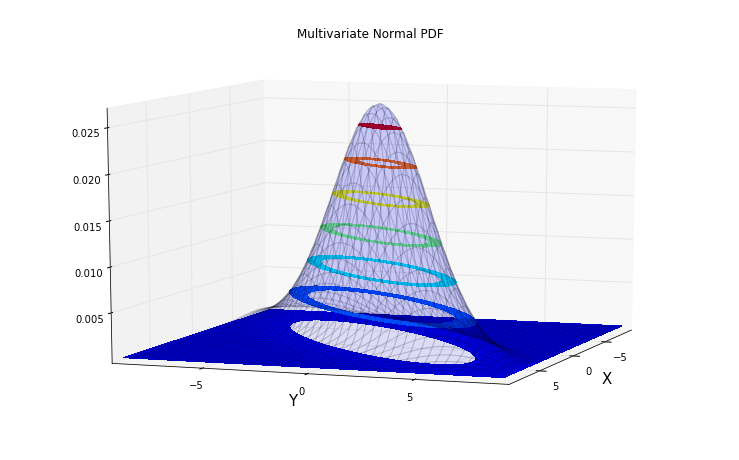

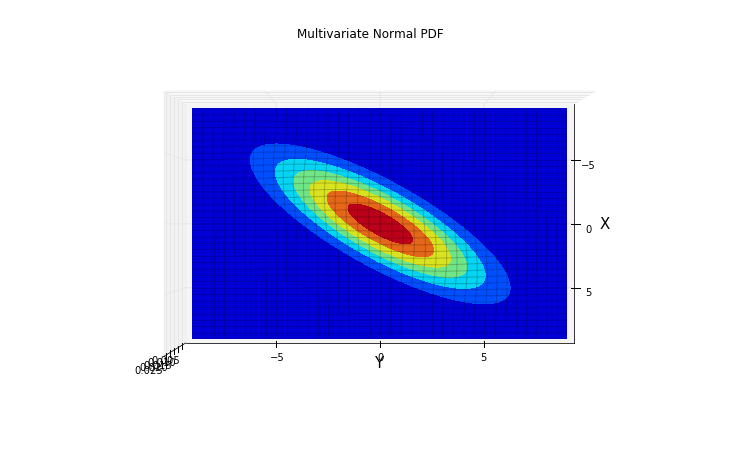

In [28]:
sigma = [[10, 8], [8, 10]]  # Матрица ковариаций
mean = [0, 0]

mylim = 9  # Граница отрезка [-mylim, mylim]
x, y = np.mgrid[-mylim:mylim:.05, -mylim:mylim:.05]  # Разбиение x и y
pos = np.empty(x.shape + (2,))  # Делаю сетку
pos[:, :, 0] = x
pos[:, :, 1] = y
rv = multivariate_normal(mean, sigma)  

# Рисую график
fig = plt.figure(figsize=(13,8))
ax = fig.gca(projection='3d')
ax.contourf(x, y, rv.pdf(pos))  # Рисую контуры
ax.plot_surface(x, y, rv.pdf(pos), \
                alpha=0.1, shade=False)  # Рисую "поверхность из плотности"
title("Multivariate Normal PDF")
xlabel("X", fontsize=15)
ylabel("Y", fontsize=15)
ax.view_init(elev=10, azim=20)  # Устанавливаю угол обзора

fig = plt.figure(figsize=(13,8))
ax = fig.gca(projection='3d')
ax.contourf(x, y, rv.pdf(pos))  # Рисую контуры
ax.plot_surface(x, y, rv.pdf(pos), \
                alpha=0.1, shade=False)  # Рисую "поверхность из плотности"
title("Multivariate Normal PDF")
xlabel("X", fontsize=15)
ylabel("Y", fontsize=15)
ax.view_init(elev=90, azim=0)  # Устанавливаю угол обзора

plt.show()

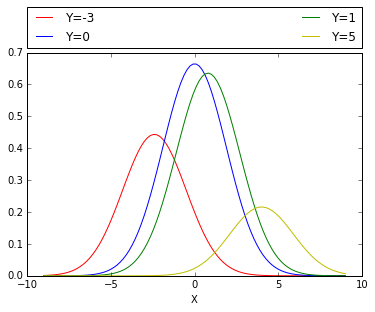

In [29]:
# Плотность кси_2 от y, mtx - матрица ковариаций
def SecDens(y, mean, mtx):
    return norm.pdf(y, loc=mean[1], scale=mtx[1][1])

# Условная плотность, mtx - матрица ковариаций
def ConditionDens(x, y, mean, mtx):
    return multivariate_normal.pdf([x,y], mean, mtx)/(SecDens(y,mean,mtx))

# Набор различных значений y
set_of_y = [-3,0,1,5]
# Набор цветов
cols = ['r', 'b', 'g', 'y']
# Разбиение отрезка [-mylim, mylim]
x = linspace(-mylim, mylim,100)

# Построение графиков условной плотности
figure()
xlabel('X', fontsize=10)
for i in range(len(set_of_y)):
    dens = []  # Сюда буду записывать значение условной плотности от (x, y)
    for xx in x:
        # Здесь x - это xx, y - set_of_y[i]
        dens.append(ConditionDens(xx,set_of_y[i],mean,sigma))
    plot(x, dens, color=cols[i], label='Y={}'.format(set_of_y[i]))    
legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, \
       mode="expand", borderaxespad=0.)
show()

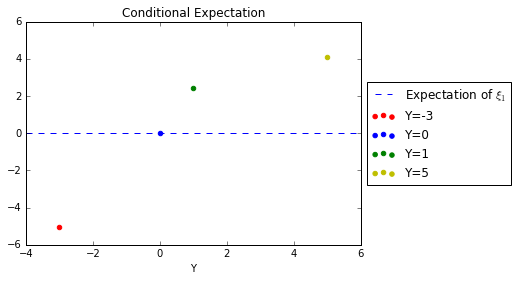

In [30]:
import scipy.integrate as integrate

# По этой функции буду считать интеграл
def f(x, y, mean, mtx):
    return x*ConditionDens(x,y,mean,mtx)

# Expect - функция условного матожидания
def Expect(y, mean, mtx, lim):
    return (integrate.quad(lambda x: f(x, y, mean, sigma),-lim,lim))[0]

limm = 400  # Предел интегрирования
figure()
xlabel('Y', fontsize=10)
title("Conditional Expectation")
for i in range(len(set_of_y)):
    # Наношу точки на график
    scatter(set_of_y[i], Expect(set_of_y[i], mean, sigma, limm), \
            color=cols[i], label='Y={}'.format(set_of_y[i]))
axhline(mean[0], linestyle='--', \
        label='Expectation of $\\xi_1$')  # Добавляю матожидание кси_1
legend(loc='center left', bbox_to_anchor=(1, 0.5))
show()